# Solution Notebook: Image Classification with LIME

## Assignment Description: Explainable AI with LIME for Image Classification

#### In this assignment, you will be introduced to the concept of Explainable AI using Python. You will get hands-on experience with the LIME (Local Interpretable Model-Agnostic Explanations) algorithm.

Your task is to:

1. **Load the pretrained InceptionV3 model**: This model, trained on the ImageNet dataset, can classify images into 1000 different categories. Keras provides a simple way of loading this model.

     **Tip**: You can find more about the InceptionV3 model in the Keras documentation. Look for [keras.applications.inception_v3.InceptionV3](https://keras.io/api/applications/inceptionv3/).


2. **Prepare the image**: This involves loading the image, resizing it to match the input size of InceptionV3 model (299 x 299), and preprocessing it using the InceptionV3 preprocessing function.

     **Tip**: The Keras **load_img** and **img_to_array** functions can be used for loading and converting images. You can find their usage in the [Keras preprocessing image module documentation](https://keras.io/api/data_loading/image/). The **preprocess_input** function is also important and its usage can be found in the [Keras InceptionV3 documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/inception_v3/preprocess_input). The **preprocess_input** function is used to prepare your image data to be fed into a neural network. Each pre-trained model provided in the Keras library expects the input data (image) to be preprocessed in a particular way. This function applies this specific preprocessing.


3. **Visualize the image & Make predictions**: Display the image to have a visual understanding of the data. Use the pretrained model to make predictions and print the top predictions.

      **Tip**: The Matplotlib library can be used for visualization in Python. You can check the **imshow** function in the [Matplotlib Pyplot module documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html). The **predict function** is a standard prediction function of any model in Keras. You can find it in the [Keras Model documentation](https://keras.io/api/models/model_training_apis/). The **decode_predictions** function can be used to convert the raw output of the model, which is typically a multi-dimensional probability distribution over the classes, into human-readable labels and their associated probabilities. The **decode_predictions** function is specific to models trained on ImageNet and can be found in the [Keras Applications Imagenet Utils documentation](https://www.tensorflow.org/api_docs/python/tf/keras/applications/imagenet_utils/decode_predictions).     


4. **Use the LIME algorithm to explain the prediction**: Create an instance of the **LimeImageExplainer**, and call the **explain_instance** method. This method generates an explanation for the top predicted classes.

    **Tip**: The LIME package has its own documentation which explains how to use the **LimeImageExplainer** and its methods ([See here](https://lime-ml.readthedocs.io/en/latest/lime.html#module-lime.lime_image)). 
    
    **The LIME package is used to explain the predictions of a machine learning model. For this, we are particularly interested in the LimeImageExplainer class and its method explain_instance.**

    **LimeImageExplainer**: This class allows you to explain predictions on image data. Create an instance without any arguments.

    * **explain_instance**: This method generates explanations for the predictions on an instance. Here are some important arguments you should be aware of:

        * image: This is your input image that you want to explain.
        * classifier_fn: This is your model prediction function that takes images and returns prediction probabilities.
        * top_labels: The number of top labels (classes) to explain.
        * hide_color: The color for the hidden parts of the image. When parts of the image are not explained, they are hidden and replaced with this color.
        * num_samples: The number of perturbations to create. (e.g. use 1000 for this assignment)

Each of these arguments can greatly affect the explanations generated by LIME, so it's important to understand what they do.
    
    
5. **Visualize the explanation**: Retrieve the explanation image and mask from the LIME explanation and visualize it using the mark_boundaries function from the skimage.segmentation module.

    **Tip**: After creating the explanations, you need to visualize them. This can be done using the get_image_and_mask method and the mark_boundaries function.

    * **get_image_and_mask**: This method of the Explanation object returned by LIME generates an image and a mask. Here are the important arguments:
        * label: The label (class) you want to explain.
        * positive_only: If True, only show the superpixels that contribute positively to the class. Otherwise, show both positive and negative contributions.
        * num_features: The number of superpixels to include in the explanation.
        * hide_rest: If True, hide the rest of the image and only show the explanatory superpixels.
     
     
     * **mark_boundaries**: This function from the skimage.segmentation module ([skimage documentation](https://scikit-image.org/docs/dev/api/skimage.segmentation.html#skimage.segmentation.mark_boundaries)) takes an image and a mask, and returns an image with the mask boundaries marked. This allows you to clearly see the superpixels identified by LIME.
  

## 1. Import the specific python modules needed for the excercise

In [6]:
import os
import keras
from keras.applications import inception_v3 as inc_net
import keras.utils as image
from keras.applications.imagenet_utils import decode_predictions
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#
inet_model = inc_net.InceptionV3()

Metal device set to: Apple M1 Pro


2023-05-29 12:10:28.435019: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-29 12:10:28.435494: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


96112376/96112376 [==============================] - 30s 0us/step


## 2. Preprocess data 

In [3]:
def transform_img_fn(path_list):
    out = []
    for img_path in path_list:
        img = image.load_img(img_path, target_size=(299, 299))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = inc_net.preprocess_input(x)
        out.append(x)
    return np.vstack(out)

## 3. Visualize and perform prediction

In [4]:
pathList = ["../../data/animals/cats/cats_00001.jpg"]

2023-05-29 12:13:25.989460: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-29 12:13:26.221535: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


35363/35363 [==============================] - 0s 1us/step
('n02123045', 'tabby', 0.45763427)
('n02123159', 'tiger_cat', 0.4575256)
('n02124075', 'Egyptian_cat', 0.021677297)
('n03201208', 'dining_table', 0.0015172631)
('n04099969', 'rocking_chair', 0.0012953705)


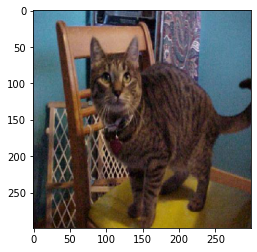

In [7]:
images = transform_img_fn(pathList)
# Divide by 2 and adding 0.5 because of how this Inception represents images
plt.imshow(images[0] / 2 + 0.5)
preds = inet_model.predict(images)
for x in decode_predictions(preds)[0]:
    print(x)

## 4. Use LIME to get an explanation for the previous conducted prediction

In [8]:
import lime
from lime import lime_image

/Users/amirmozahebi/opt/anaconda3/envs/tfl/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
explainer = lime_image.LimeImageExplainer()

In [10]:
explanation = explainer.explain_instance(images[0].astype('double'), inet_model.predict, top_labels=5, hide_color=0, num_samples=1000)

  0%|                                                  | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 2s 2s/step


  1%|▍                                        | 10/1000 [00:01<02:54,  5.68it/s]

1/1 [==============================] - 0s 29ms/step


  2%|▊                                        | 20/1000 [00:01<01:18, 12.52it/s]

1/1 [==============================] - 0s 31ms/step


  3%|█▏                                       | 30/1000 [00:01<00:47, 20.59it/s]

1/1 [==============================] - 0s 25ms/step


  4%|█▋                                       | 40/1000 [00:02<00:32, 29.60it/s]

1/1 [==============================] - 0s 25ms/step


  5%|██                                       | 50/1000 [00:02<00:24, 39.12it/s]

1/1 [==============================] - 0s 25ms/step


  6%|██▍                                      | 60/1000 [00:02<00:19, 48.53it/s]

1/1 [==============================] - 0s 25ms/step


  7%|██▊                                      | 70/1000 [00:02<00:16, 57.49it/s]

1/1 [==============================] - 0s 24ms/step


  8%|███▎                                     | 80/1000 [00:02<00:14, 65.02it/s]

1/1 [==============================] - 0s 23ms/step


  9%|███▋                                     | 90/1000 [00:02<00:12, 71.71it/s]

1/1 [==============================] - 0s 25ms/step


 10%|████                                    | 100/1000 [00:02<00:11, 76.37it/s]

1/1 [==============================] - 0s 24ms/step


 11%|████▍                                   | 110/1000 [00:02<00:11, 80.59it/s]

1/1 [==============================] - 0s 24ms/step


 12%|████▊                                   | 120/1000 [00:02<00:10, 83.47it/s]

1/1 [==============================] - 0s 24ms/step


 13%|█████▏                                  | 130/1000 [00:03<00:10, 85.77it/s]

1/1 [==============================] - 0s 24ms/step


 14%|█████▌                                  | 140/1000 [00:03<00:09, 87.53it/s]

1/1 [==============================] - 0s 24ms/step


 15%|██████                                  | 150/1000 [00:03<00:09, 89.19it/s]

1/1 [==============================] - 0s 24ms/step


 16%|██████▍                                 | 160/1000 [00:03<00:09, 90.45it/s]

1/1 [==============================] - 0s 24ms/step


 17%|██████▊                                 | 170/1000 [00:03<00:09, 90.66it/s]

1/1 [==============================] - 0s 25ms/step


 18%|███████▏                                | 180/1000 [00:03<00:09, 90.51it/s]

1/1 [==============================] - 0s 24ms/step


 19%|███████▌                                | 190/1000 [00:03<00:08, 90.54it/s]

1/1 [==============================] - 0s 23ms/step


 20%|████████                                | 200/1000 [00:03<00:08, 90.99it/s]

1/1 [==============================] - 0s 24ms/step


 21%|████████▍                               | 210/1000 [00:03<00:08, 91.40it/s]

1/1 [==============================] - 0s 24ms/step


 22%|████████▊                               | 220/1000 [00:04<00:08, 91.63it/s]

1/1 [==============================] - 0s 24ms/step


 23%|█████████▏                              | 230/1000 [00:04<00:08, 91.65it/s]

1/1 [==============================] - 0s 24ms/step


 24%|█████████▌                              | 240/1000 [00:04<00:08, 92.13it/s]

1/1 [==============================] - 0s 23ms/step


 25%|██████████                              | 250/1000 [00:04<00:08, 92.20it/s]

1/1 [==============================] - 0s 24ms/step


 26%|██████████▍                             | 260/1000 [00:04<00:08, 91.75it/s]

1/1 [==============================] - 0s 24ms/step


 27%|██████████▊                             | 270/1000 [00:04<00:07, 92.25it/s]

1/1 [==============================] - 0s 23ms/step


 28%|███████████▏                            | 280/1000 [00:04<00:07, 92.45it/s]

1/1 [==============================] - 0s 24ms/step


 29%|███████████▌                            | 290/1000 [00:04<00:07, 91.78it/s]

1/1 [==============================] - 0s 25ms/step


 30%|████████████                            | 300/1000 [00:04<00:07, 91.45it/s]

1/1 [==============================] - 0s 25ms/step


 31%|████████████▍                           | 310/1000 [00:05<00:07, 91.45it/s]

1/1 [==============================] - 0s 24ms/step


 32%|████████████▊                           | 320/1000 [00:05<00:07, 91.72it/s]

1/1 [==============================] - 0s 23ms/step


 33%|█████████████▏                          | 330/1000 [00:05<00:07, 91.78it/s]

1/1 [==============================] - 0s 24ms/step


 34%|█████████████▌                          | 340/1000 [00:05<00:07, 91.65it/s]

1/1 [==============================] - 0s 23ms/step


 35%|██████████████                          | 350/1000 [00:05<00:07, 92.04it/s]

1/1 [==============================] - 0s 24ms/step


 36%|██████████████▍                         | 360/1000 [00:05<00:06, 92.40it/s]

1/1 [==============================] - 0s 24ms/step


 37%|██████████████▊                         | 370/1000 [00:05<00:06, 92.38it/s]

1/1 [==============================] - 0s 24ms/step


 38%|███████████████▏                        | 380/1000 [00:05<00:06, 91.59it/s]

1/1 [==============================] - 0s 24ms/step


 39%|███████████████▌                        | 390/1000 [00:05<00:06, 90.94it/s]

1/1 [==============================] - 0s 24ms/step


 40%|████████████████                        | 400/1000 [00:06<00:06, 91.46it/s]

1/1 [==============================] - 0s 24ms/step


 41%|████████████████▍                       | 410/1000 [00:06<00:06, 91.13it/s]

1/1 [==============================] - 0s 23ms/step


 42%|████████████████▊                       | 420/1000 [00:06<00:06, 91.30it/s]

1/1 [==============================] - 0s 24ms/step


 43%|█████████████████▏                      | 430/1000 [00:06<00:06, 91.28it/s]

1/1 [==============================] - 0s 24ms/step


 44%|█████████████████▌                      | 440/1000 [00:06<00:06, 91.35it/s]

1/1 [==============================] - 0s 24ms/step


 45%|██████████████████                      | 450/1000 [00:06<00:05, 91.76it/s]

1/1 [==============================] - 0s 25ms/step


 46%|██████████████████▍                     | 460/1000 [00:06<00:05, 91.55it/s]

1/1 [==============================] - 0s 24ms/step


 47%|██████████████████▊                     | 470/1000 [00:06<00:05, 92.14it/s]

1/1 [==============================] - 0s 24ms/step


 48%|███████████████████▏                    | 480/1000 [00:06<00:05, 90.90it/s]

1/1 [==============================] - 0s 23ms/step


 49%|███████████████████▌                    | 490/1000 [00:07<00:05, 91.18it/s]

1/1 [==============================] - 0s 23ms/step


 50%|████████████████████                    | 500/1000 [00:07<00:05, 91.50it/s]

1/1 [==============================] - 0s 23ms/step


 51%|████████████████████▍                   | 510/1000 [00:07<00:05, 92.03it/s]

1/1 [==============================] - 0s 23ms/step


 52%|████████████████████▊                   | 520/1000 [00:07<00:05, 92.74it/s]

1/1 [==============================] - 0s 23ms/step


 53%|█████████████████████▏                  | 530/1000 [00:07<00:05, 92.99it/s]

1/1 [==============================] - 0s 24ms/step


 54%|█████████████████████▌                  | 540/1000 [00:07<00:04, 92.82it/s]

1/1 [==============================] - 0s 24ms/step


 55%|██████████████████████                  | 550/1000 [00:07<00:04, 92.09it/s]

1/1 [==============================] - 0s 26ms/step


 56%|██████████████████████▍                 | 560/1000 [00:07<00:04, 91.48it/s]

1/1 [==============================] - 0s 26ms/step


 57%|██████████████████████▊                 | 570/1000 [00:07<00:04, 90.83it/s]

1/1 [==============================] - 0s 24ms/step


 58%|███████████████████████▏                | 580/1000 [00:08<00:04, 89.66it/s]

1/1 [==============================] - 0s 24ms/step


 59%|███████████████████████▌                | 590/1000 [00:08<00:04, 89.67it/s]

1/1 [==============================] - 0s 24ms/step


 60%|████████████████████████                | 600/1000 [00:08<00:04, 89.63it/s]

1/1 [==============================] - 0s 23ms/step


 61%|████████████████████████▍               | 610/1000 [00:08<00:04, 90.19it/s]

1/1 [==============================] - 0s 25ms/step


 62%|████████████████████████▊               | 620/1000 [00:08<00:04, 90.67it/s]

1/1 [==============================] - 0s 25ms/step


 63%|█████████████████████████▏              | 630/1000 [00:08<00:04, 91.59it/s]

1/1 [==============================] - 0s 25ms/step


 64%|█████████████████████████▌              | 640/1000 [00:08<00:03, 92.66it/s]

1/1 [==============================] - 0s 25ms/step


 65%|██████████████████████████              | 650/1000 [00:08<00:03, 92.94it/s]

1/1 [==============================] - 0s 24ms/step


 66%|██████████████████████████▍             | 660/1000 [00:08<00:03, 93.07it/s]

1/1 [==============================] - 0s 24ms/step


 67%|██████████████████████████▊             | 670/1000 [00:08<00:03, 92.22it/s]

1/1 [==============================] - 0s 24ms/step


 68%|███████████████████████████▏            | 680/1000 [00:09<00:03, 91.74it/s]

1/1 [==============================] - 0s 24ms/step


 69%|███████████████████████████▌            | 690/1000 [00:09<00:03, 91.97it/s]

1/1 [==============================] - 0s 24ms/step


 70%|████████████████████████████            | 700/1000 [00:09<00:03, 92.43it/s]

1/1 [==============================] - 0s 24ms/step


 71%|████████████████████████████▍           | 710/1000 [00:09<00:03, 92.51it/s]

1/1 [==============================] - 0s 24ms/step


 72%|████████████████████████████▊           | 720/1000 [00:09<00:03, 92.14it/s]

1/1 [==============================] - 0s 25ms/step


 73%|█████████████████████████████▏          | 730/1000 [00:09<00:02, 92.30it/s]

1/1 [==============================] - 0s 24ms/step


 74%|█████████████████████████████▌          | 740/1000 [00:09<00:02, 92.53it/s]

1/1 [==============================] - 0s 24ms/step


 75%|██████████████████████████████          | 750/1000 [00:09<00:02, 92.47it/s]

1/1 [==============================] - 0s 24ms/step


 76%|██████████████████████████████▍         | 760/1000 [00:09<00:02, 92.52it/s]

1/1 [==============================] - 0s 24ms/step


 77%|██████████████████████████████▊         | 770/1000 [00:10<00:02, 91.34it/s]

1/1 [==============================] - 0s 23ms/step


 78%|███████████████████████████████▏        | 780/1000 [00:10<00:02, 92.14it/s]

1/1 [==============================] - 0s 24ms/step


 79%|███████████████████████████████▌        | 790/1000 [00:10<00:02, 91.74it/s]

1/1 [==============================] - 0s 24ms/step


 80%|████████████████████████████████        | 800/1000 [00:10<00:02, 92.06it/s]

1/1 [==============================] - 0s 24ms/step


 81%|████████████████████████████████▍       | 810/1000 [00:10<00:02, 92.08it/s]

1/1 [==============================] - 0s 24ms/step


 82%|████████████████████████████████▊       | 820/1000 [00:10<00:01, 91.94it/s]

1/1 [==============================] - 0s 24ms/step


 83%|█████████████████████████████████▏      | 830/1000 [00:10<00:01, 92.15it/s]

1/1 [==============================] - 0s 24ms/step


 84%|█████████████████████████████████▌      | 840/1000 [00:10<00:01, 92.32it/s]

1/1 [==============================] - 0s 24ms/step


 85%|██████████████████████████████████      | 850/1000 [00:10<00:01, 92.61it/s]

1/1 [==============================] - 0s 24ms/step


 86%|██████████████████████████████████▍     | 860/1000 [00:11<00:01, 92.57it/s]

1/1 [==============================] - 0s 24ms/step


 87%|██████████████████████████████████▊     | 870/1000 [00:11<00:01, 91.11it/s]

1/1 [==============================] - 0s 24ms/step


 88%|███████████████████████████████████▏    | 880/1000 [00:11<00:01, 91.58it/s]

1/1 [==============================] - 0s 24ms/step


 89%|███████████████████████████████████▌    | 890/1000 [00:11<00:01, 92.00it/s]

1/1 [==============================] - 0s 23ms/step


 90%|████████████████████████████████████    | 900/1000 [00:11<00:01, 91.69it/s]

1/1 [==============================] - 0s 25ms/step


 91%|████████████████████████████████████▍   | 910/1000 [00:11<00:00, 91.30it/s]

1/1 [==============================] - 0s 24ms/step


 92%|████████████████████████████████████▊   | 920/1000 [00:11<00:00, 92.08it/s]

1/1 [==============================] - 0s 24ms/step


 93%|█████████████████████████████████████▏  | 930/1000 [00:11<00:00, 92.66it/s]

1/1 [==============================] - 0s 24ms/step


 94%|█████████████████████████████████████▌  | 940/1000 [00:11<00:00, 92.26it/s]

1/1 [==============================] - 0s 23ms/step


 95%|██████████████████████████████████████  | 950/1000 [00:12<00:00, 92.27it/s]

1/1 [==============================] - 0s 24ms/step


 96%|██████████████████████████████████████▍ | 960/1000 [00:12<00:00, 90.48it/s]

1/1 [==============================] - 0s 24ms/step


 97%|██████████████████████████████████████▊ | 970/1000 [00:12<00:00, 90.69it/s]

1/1 [==============================] - 0s 23ms/step


 98%|███████████████████████████████████████▏| 980/1000 [00:12<00:00, 91.29it/s]

1/1 [==============================] - 0s 23ms/step


 99%|███████████████████████████████████████▌| 990/1000 [00:12<00:00, 91.74it/s]

1/1 [==============================] - 0s 24ms/step


100%|███████████████████████████████████████| 1000/1000 [00:12<00:00, 79.51it/s]


## 5. Visualize the explanation from LIME

In [11]:
from skimage.segmentation import mark_boundaries

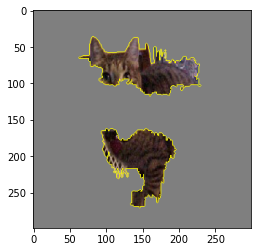

In [14]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

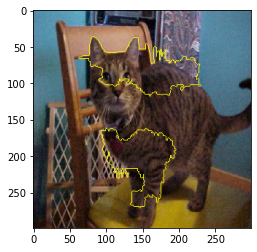

In [20]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

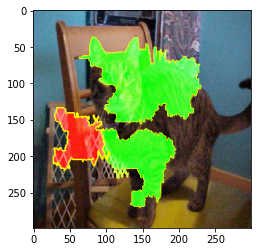

In [15]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=10, hide_rest=False)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

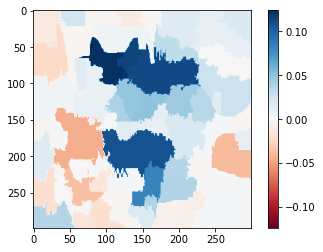

In [24]:
#Select the same class explained on the figures above.
ind =  explanation.top_labels[0]

#Map each explanation weight to the corresponding superpixel
dict_heatmap = dict(explanation.local_exp[ind])
heatmap = np.vectorize(dict_heatmap.get)(explanation.segments) 

#Plot. The visualization makes more sense if a symmetrical colorbar is used.
plt.imshow(heatmap, cmap = 'RdBu', vmin  = -heatmap.max(), vmax = heatmap.max())
plt.colorbar()